## A1.1 Obtain PDB File

In [1]:
import urllib.request
import matplotlib.pyplot as plt

def get_pdb_file(protein_name:str):
    print(f"Going to download : {protein_name}")
    file_url = "https://files.rcsb.org/download/"+protein_name+".pdb"
    download_file_name = protein_name+".pdb"
    urllib.request.urlretrieve(file_url, download_file_name)
    print(f"Downloaded {protein_name}.pdb")
    with open(download_file_name) as file_handle:
        data = file_handle.read()
        lines = data.split("\n")
    print("The first line is : " + lines[0])

get_pdb_file("3SJU")

Going to download : 3SJU
Downloaded 3SJU.pdb
The first line is : HEADER    OXIDOREDUCTASE                          21-JUN-11   3SJU              


## A2.1 Process file and plot amino acid frequencies

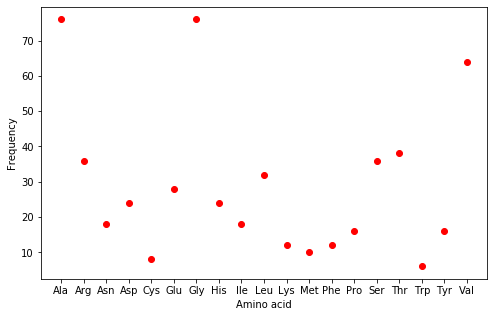

In [2]:
x = ["Ala", "Arg", "Asn", "Asp", "Cys", "Glu", "Gly", "His",
    "Ile", "Leu", "Lys", "Met", "Phe", "Pro", "Ser", "Thr",
    "Trp", "Tyr", "Val"]

# Process file and extract amino acids in a list
with open("3SJU.pdb") as f:
    data = f.read()
    data = data.split("\n")
all_aa = []
for line in data:
    if line.startswith("SEQRES"):
        this_line_list = line.split()
        this_line_aa = this_line_list[4:]
        [all_aa.append(an_aa.capitalize()) for an_aa in this_line_aa]

def get_counts(aa_list):
    y = []
    for an_aa in x:
        y.append(aa_list.count(an_aa))
    return y

counts = get_counts(all_aa)        
plt.figure(figsize=(8,5)) # fig size is optional
plt.plot(x, counts, "ro")
plt.xlabel("Amino acid");
plt.ylabel("Frequency");
plt.savefig("imgs/f1.png")
#TODO: ADD ATOM EXTRACTION CODE

## A2.2 Use single letter amino acid labels on X axis

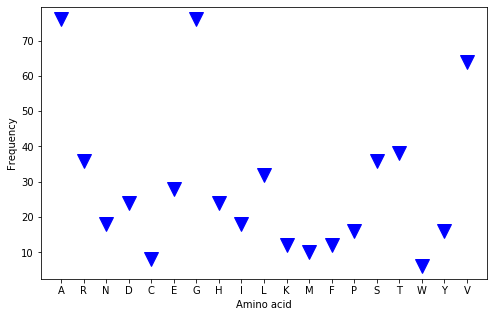

In [3]:
aa_dict = {"ala":"A", "arg":"R", "asn":"N", "asp":"D", 
           "asx":"B", "cys":"C", "glu":"E", 
           "gln":"Q","glx":"Z","gly":"G", "his":"H", 
           "ile":"I","leu":"L", "lys":"K", "met":"M",
           "phe":"F", "pro":"P", "ser":"S", "thr":"T",
           "trp":"W", "tyr":"Y", "val":"V"}
new_x = []
for an_aa in x:
    new_x.append(aa_dict[an_aa.lower()])

plt.figure(figsize=(8,5))
plt.plot(new_x, counts, "bv", markersize=14)
plt.xlabel("Amino acid");
plt.ylabel("Frequency");
plt.savefig("imgs/f2.png")

## A2.3 (challenge) Overlay odd and even counts + legend

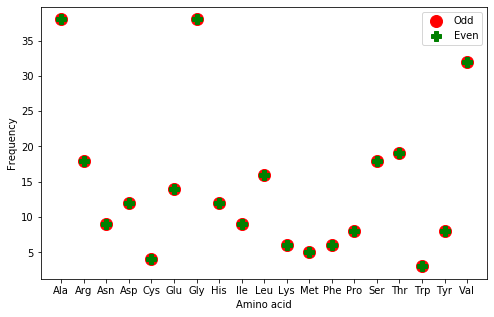

In [4]:
even_aa = []
odd_aa = []

for ind1, an_aa in enumerate(all_aa):
    if ind1 % 2 == 0:
        even_aa.append(an_aa.capitalize())
    else:
        odd_aa.append(an_aa.capitalize())

odd_counts = get_counts(odd_aa)
even_counts = get_counts(even_aa)
        
plt.figure(figsize=(8,5))
# plt.hist(even_aa, color="blue", alpha=0.5, label="Even")
# plt.hist(odd_aa, color="red", alpha=0.5, label="Odd")
plt.plot(x, odd_counts, "ro", markersize=12, label="Odd")
plt.plot(x, even_counts, "gP", markersize=10, label="Even")
plt.xlabel("Amino acid");
plt.ylabel("Frequency");
plt.legend()
plt.savefig("imgs/f3.png")

## A3.1 (Challenge) Longest common substring

In [5]:
from LongestCommonSubsequence import lcs

def extract(pdb_name):
    with open(pdb_name) as f:
        data = f.read()
        data = data.split("\n")
    all_aa = []
    for line in data:
        if line.startswith("SEQRES"):
            this_line_list = line.split()
            this_line_aa = this_line_list[4:]
            [all_aa.append(an_aa.capitalize()) for an_aa in this_line_aa]
    all_aa_one_letter = []
    for an_aa in all_aa:
        all_aa_one_letter.append(aa_dict[an_aa.lower()])
    return ''.join(all_aa_one_letter)

get_pdb_file("3SJU")
get_pdb_file("1X7H")

seq1 = extract("3SJU.pdb") # returns one letter string
seq2 = extract("1X7H.pdb")

m = len(seq1)
n = len(seq2)
print(f"Length of seq1 : {m}, length of seq2 : {n}")
lcs(seq1, seq2, m, n)

Going to download : 3SJU
Downloaded 3SJU.pdb
The first line is : HEADER    OXIDOREDUCTASE                          21-JUN-11   3SJU              
Going to download : 1X7H
Downloaded 1X7H.pdb
The first line is : HEADER    OXIDOREDUCTASE                          13-AUG-04   1X7H              
Length of seq1 : 558, length of seq2 : 522
The LCS is MSVAVTGSGIGLARRGGRVVGLRAGVDGCDVSVAVAAVERGPLVNAGRGGGTALALWLDTNLTGVFRVTVLAGGMEGGRIVNIASTGGKQGVAAPYASKHGVVGFTKGELATGITVNAVCPGVETPMAVREHWVTEEAIPGRYPEVAVYLAAATAQALNVCGGLGNYMSVAVTGSGIGLARRGGRVVGLRAGVDGCDVSVAVAAVERGPLVNAGRGGGTALALWLDTNLTGVFRVTVLAGGMEGGRIVNIASTGGKQGVAAPYASKHGVVGFTKGELATGITVNAVCPGVETPMAVREHWVTEEAIPGRYPEVAVYLAAATAQALNVCGGLGNY
Length of the LCS is 334
